# M7-L2 Problem 1

In this function you will:
- Learn to use SciKit-Learn's `MLPRegressor()` model
- Look at the loss curve of an sklearn neural network
- Try out multiple activation functions


First, load the data in the following cell. This is the same data from M7-L1-P2



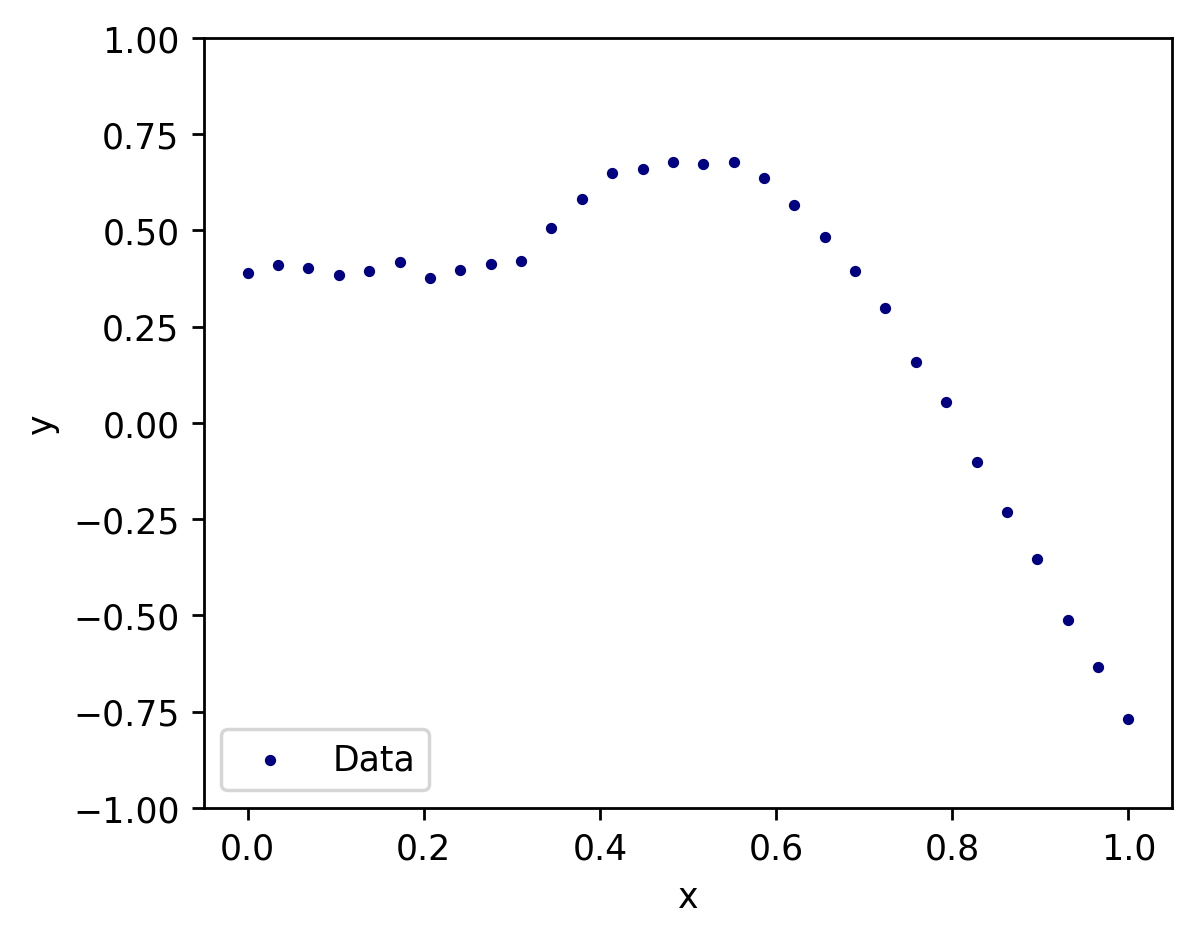

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

x = np.array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]).reshape(-1,1)
y = np.array([ 0.38914369,  0.40997345,  0.40282978,  0.38493705,  0.394214  ,0.41651437,  0.37573321,  0.39571087,  0.41265936,  0.41953955,0.50596807,  0.58059196,  0.6481607 ,  0.66050901,  0.67741369,0.67348567,  0.67696078,  0.63537378,  0.56446933,  0.48265412,0.39540671,  0.29878237,  0.15893846,  0.05525194, -0.10070259,-0.23055219, -0.35288448, -0.51317604, -0.63377544, -0.76849408])


plt.figure(figsize=(5,4),dpi=250)
plt.scatter(x,y,s=5,c="navy",label="Data")
plt.legend(loc="lower left")
plt.ylim(-1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## `MLPRegressor()`

Here, we create a simple MLP Regressor in sklearn and plot the results. The model is created and fitted in the same way as any other sklearn model.
We choose hidden layer sizes 10,10. Note that our input and output are both 1-D, but we don't need to specify this at initialization.

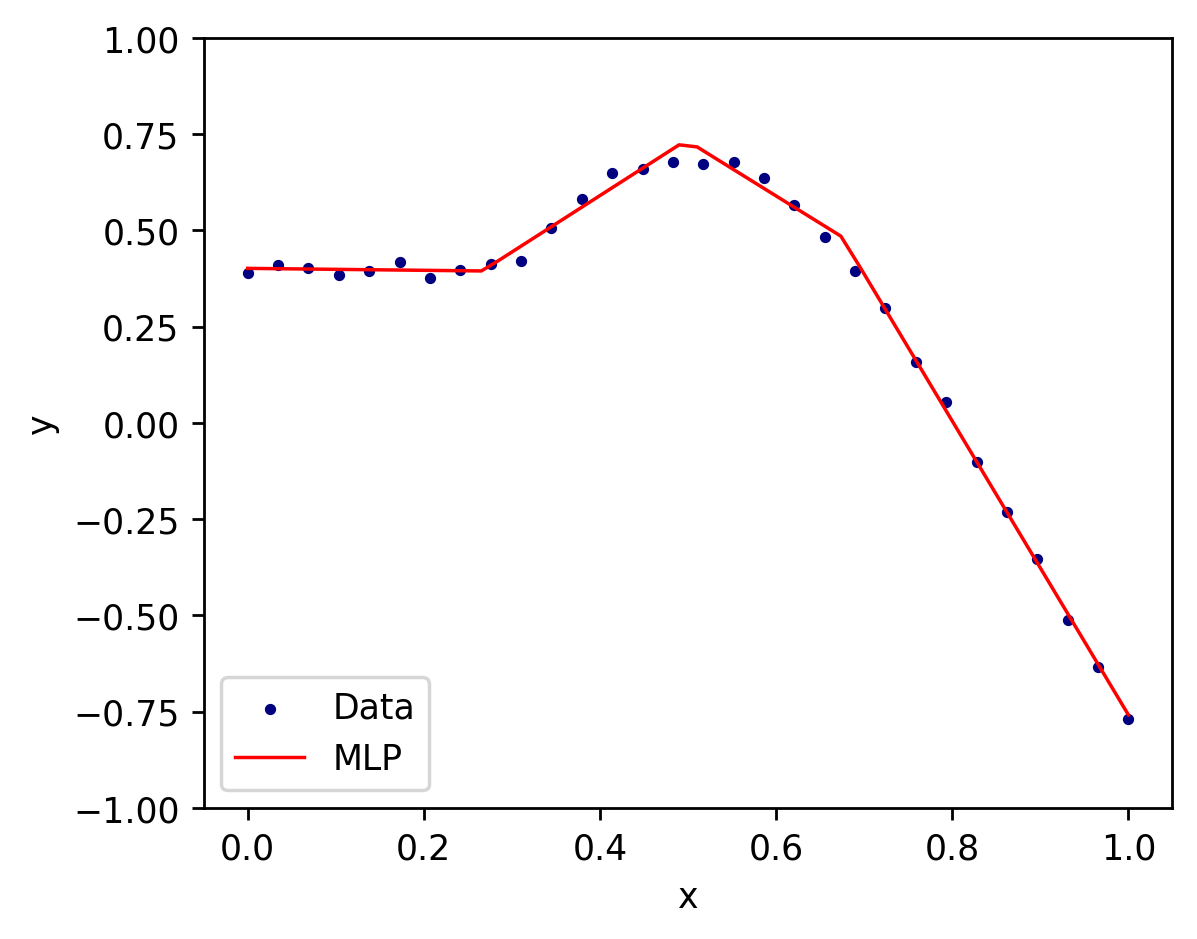

In [30]:
mlp = MLPRegressor(hidden_layer_sizes=[10,10], max_iter=10000, tol=1e-10) # Tune here
mlp.fit(x, y)

xs = np.linspace(0,1)
ys = mlp.predict(xs.reshape(-1,1))

plt.figure(figsize=(5,4),dpi=250)
plt.scatter(x,y,s=5,c="navy",label="Data")
plt.plot(xs,ys,"r-",linewidth=1,label="MLP")
plt.legend(loc="lower left")
plt.ylim(-1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Tuning training hyperparameters
Chances are, the model above did a poor job fitting the data. Try changing the following parameters when initializing the `MLPRegressor` in the cell above:
- `max_iter` (this will need to be very large)
- `tol` (this will need to be very small)

You can read about what these do at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

## Question
1. What values of `max_iter` and `tol` gave you a reasonable fit?

    `max_iter` = 10000 and `tol` = 1e-10 gave a reasonable fit.
    


## Loss Curve

We can look at the loss curve by accessing `mlp.loss_curve_`. Let's plot this below:

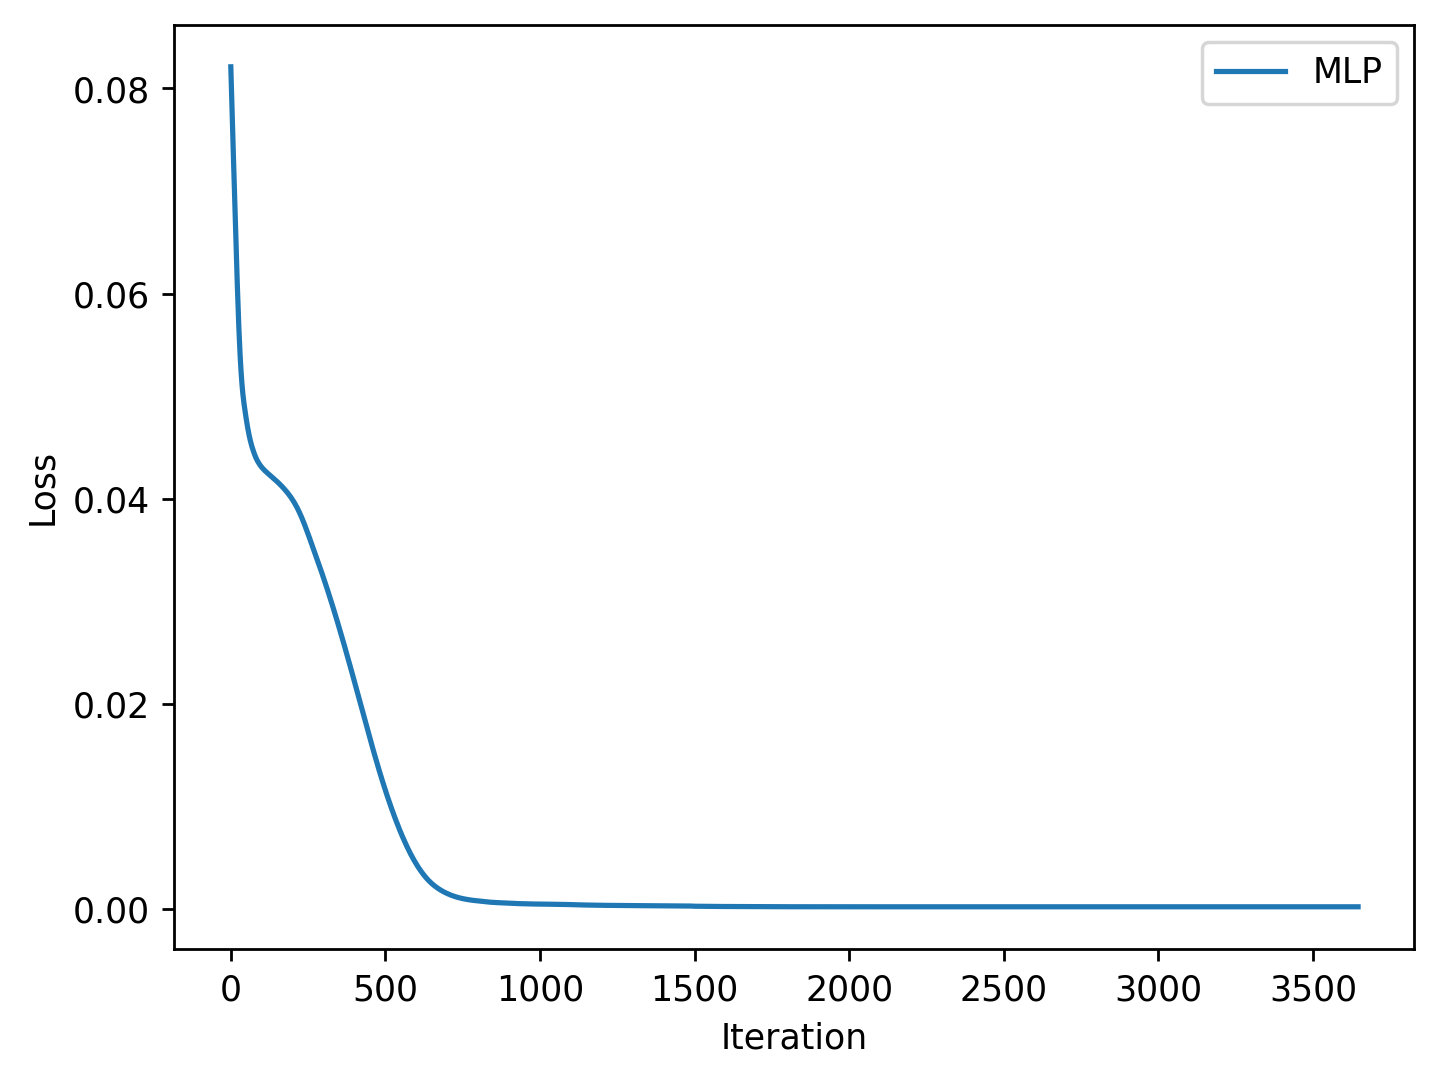

In [31]:
loss = mlp.loss_curve_
plt.figure(dpi=250)
plt.plot(loss,label="MLP")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Activation Functions
Sklearn provides the following activation functions:
- `"identity"` (This is a linear function, it should not give good results)
- `"logistic"` (We call this 'sigmoid', although both this and tanh are sigmoid functions)
- `"tanh"`
- `"relu"`

Run the following cell to train a model on each. They can be accessed via, for example: `models["relu"]` for the relu activation model

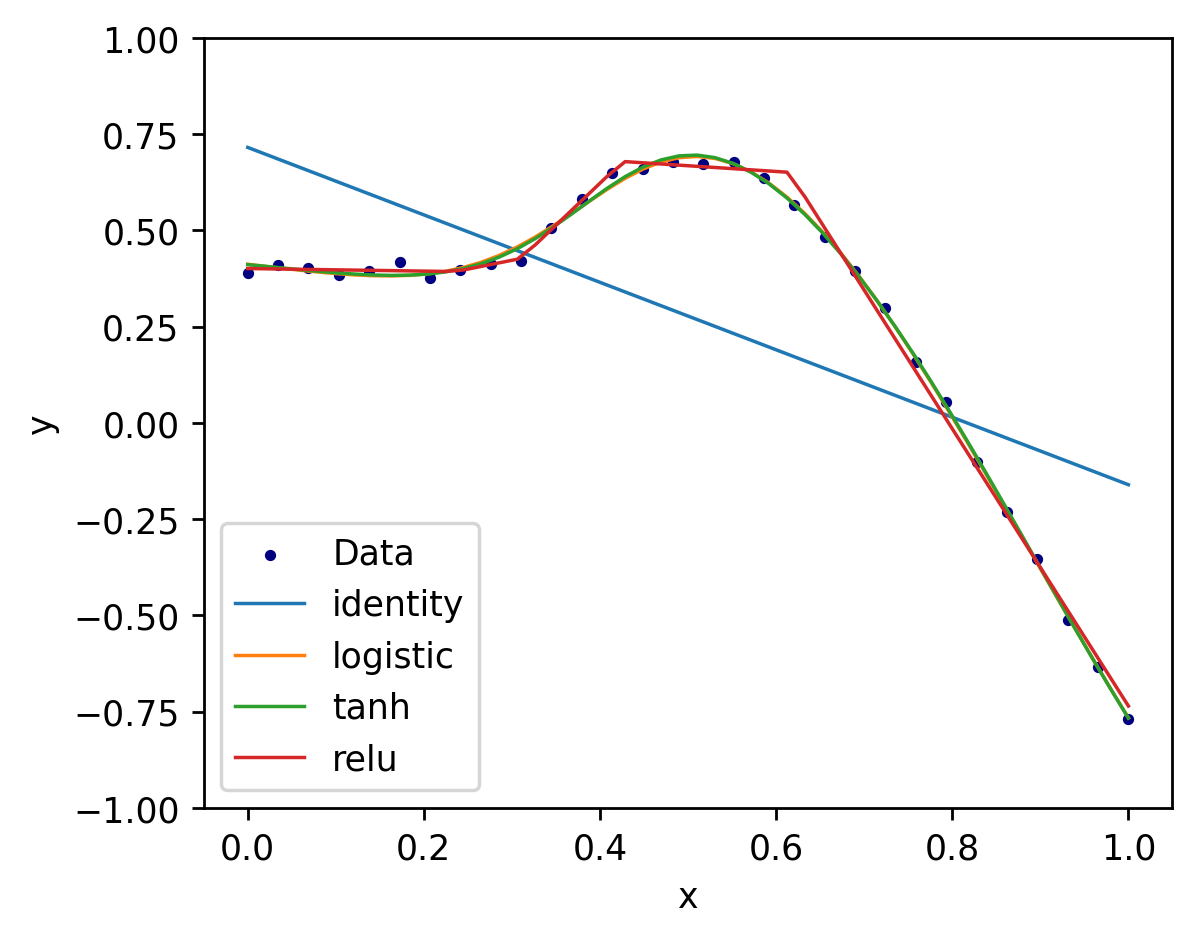

In [32]:
activations = ["identity","logistic","tanh","relu"]
models = dict()

for act in activations:
    model = MLPRegressor([10,10],random_state=50, activation=act,max_iter=100000,tol=1e-11)
    model.fit(x,y)
    models[act] = model

xs = np.linspace(0,1)
plt.figure(figsize=(5,4),dpi=250)
plt.scatter(x,y,s=5,c="navy",label="Data")

for act in activations:
    model = models[act]
    ys = model.predict(xs.reshape(-1,1))
    plt.plot(xs,ys,linewidth=1,label=act)

plt.legend(loc="lower left")
plt.ylim(-1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Loss curves
Now, create another loss curve plot, but this time, include all four MLP models with a legend indicating which activation function corresponds to each curve.

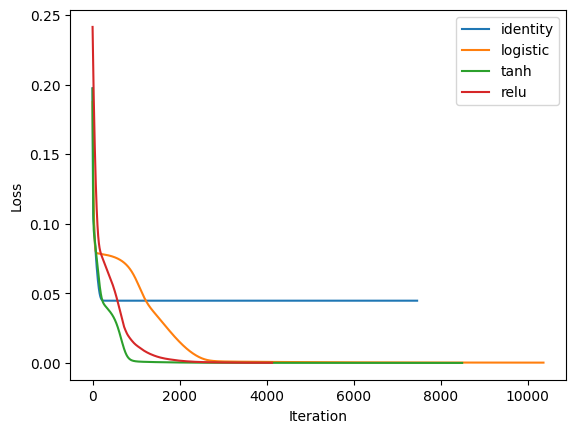

In [33]:
# YOUR CODE GOES HERE
for act in activations:
    model = models[act]
    loss = model.loss_curve_
    plt.plot(loss,label=act)

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Questions


2. Which activation functions produced a good fit?

    The logistic, tanh, and relu functions produced a good fit.


3. Which activation function's model converged the "slowest"?

    The logistic activation function model converged the slowest.


4. Of the networks that fit well, which activation function's model converged the "fastest"?

    Of the networks that fit well, the tanh activation funvtion model converged the fastest.

